In [18]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [8]:
df = pd.read_csv(r'C:\Users\nico_\Desktop\Time series\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\Miles_Traveled.csv', index_col='DATE', parse_dates=True)

In [10]:
df.index.freq='MS'

In [12]:
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [14]:
df.columns=['Value']

<Axes: xlabel='DATE'>

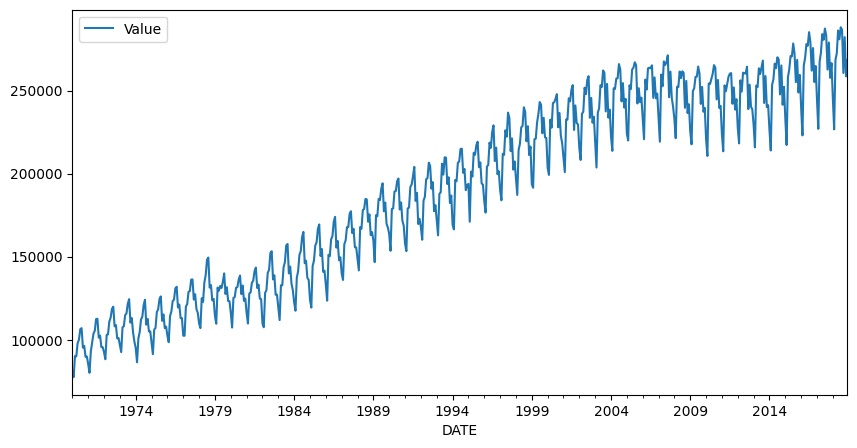

In [16]:
df.plot(figsize=(10,5))

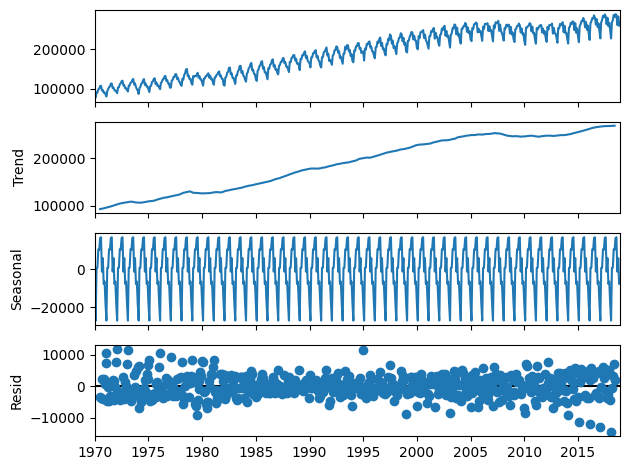

In [28]:
results = seasonal_decompose(df)
results.plot();

<Axes: xlabel='DATE'>

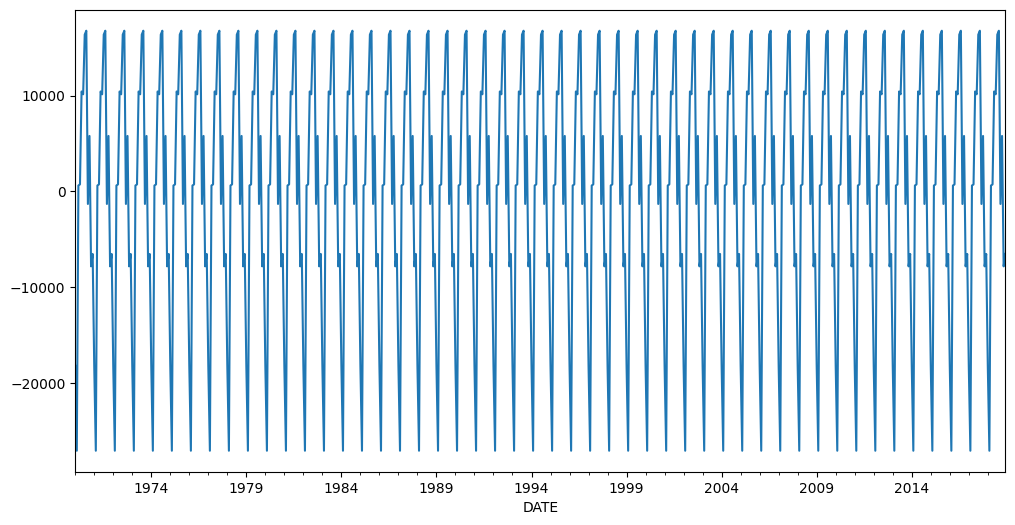

In [30]:
results.seasonal.plot(figsize=(12,6))

# Train Test split with test the last 12 months

In [33]:
len(df)

588

In [37]:
588-12

576

In [58]:
train=df.iloc[:576]
test=df.iloc[576:]

# Normalisation

In [62]:
scaler=MinMaxScaler()

In [64]:
scaler.fit(train)

MinMaxScaler()

In [66]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator (Coinvert times series in sequences)

In [70]:
n_input = 12
n_features = 1

train_generator = TimeseriesGenerator(scaled_train,scaled_train, length=n_input, batch_size=1)

In [78]:
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input,n_features)))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mse')

C:\Users\nico_\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 150)            │        91,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,351 (356.84 KB)

 Trainable params: 91,351 (356.84 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
model.fit(train_generator, epochs=30)

Epoch 1/30


C:\Users\nico_\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0215
Epoch 2/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0055  
Epoch 3/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0042  
Epoch 4/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0033
Epoch 5/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0026
Epoch 6/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0015
Epoch 7/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016
Epoch 8/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014
Epoch 9/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013    
Epoch 10/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011    
Epoch 11/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011    
Epoch 12/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.9312e-04
Epoch 13/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.1238e-04
Epoch 14/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2446e-04
Epoch 15/30
564/564 ━━━━━━━━━━━━━━━━━━━━

In [86]:
model.history.history.keys()

dict_keys(['loss'])

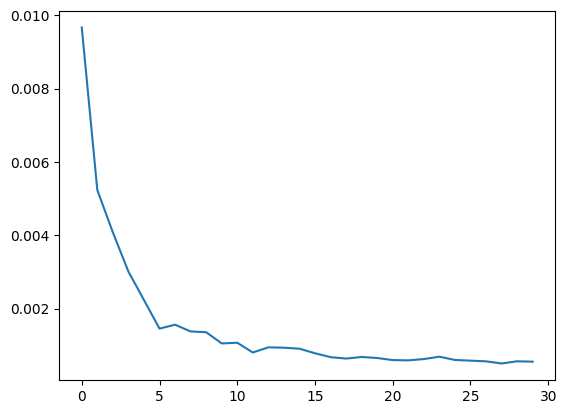

In [94]:
myloss = model.history.history['loss']
plt.plot(range(len(myloss)), myloss)

# Evaluation on test data

In [117]:
test_predictions =[]

# Reshape
first_eval_batch = scaled_train[-n_input:]   # 12 last points

current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):    # # Replace len(test) if I want more months of forecast

    current_pred = model.predict(current_batch)[0]

    test_predictions.append(current_pred)

    # UPDATE current batch to include prediction
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [119]:
test_predictions

[array([0.82071227], dtype=float32),
 array([0.75291896], dtype=float32),
 array([0.915789], dtype=float32),
 array([0.9479788], dtype=float32),
 array([0.9988875], dtype=float32),
 array([0.98755854], dtype=float32),
 array([1.0147855], dtype=float32),
 array([0.99441105], dtype=float32),
 array([0.9144022], dtype=float32),
 array([0.97216564], dtype=float32),
 array([0.8864387], dtype=float32),
 array([0.9188152], dtype=float32)]

# Inverse Transformations

In [122]:
true_predictions = scaler.inverse_transform(test_predictions)

In [124]:
test['Predictions'] = true_predictions

C:\Users\nico_\AppData\Local\Temp\ipykernel_27096\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [126]:
test

,Value,Predictions
DATE,,
2018-01-01,245695.0,249710.325839
2018-02-01,226660.0,235480.442343
2018-03-01,268480.0,269667.028598
2018-04-01,272475.0,276423.696960
2018-05-01,286164.0,287109.480794
2018-06-01,280877.0,284731.525877
2018-07-01,288145.0,290446.497151
2018-08-01,286608.0,286169.874073
2018-09-01,260595.0,269375.933426


<Axes: xlabel='DATE'>

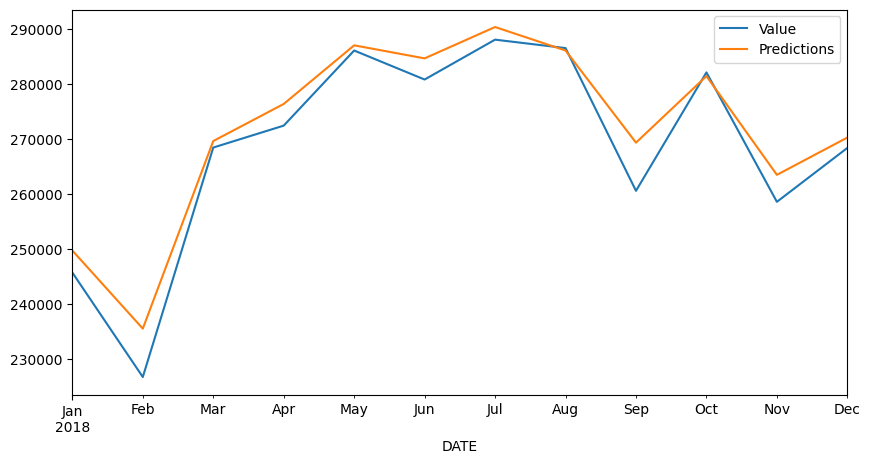

In [130]:
test.plot(figsize=(10,5))

In [132]:
rmse(test['Value'], test['Predictions'])

4448.43329634391

In [134]:
test['Value'].mean()

268739.6666666667

In [136]:
rmse(test['Value'], test['Predictions']) * 100 / test['Value'].mean()

1.6552946394257304

Error of 1.66% to the test set

# Saving the model

In [140]:
model.save('Model_RNN_Miles_traveled.keras')

# Model with 2 layers of LSTM

In [147]:
model = Sequential()
model.add(LSTM(150, activation='relu',return_sequences=True ,input_shape=(n_input,n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\Users\nico_\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [149]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 12, 150)        │        91,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100)            │       100,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,701 (748.83 KB)

 Trainable params: 191,701 (748.83 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
model.fit(train_generator,epochs=30)

Epoch 1/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0270
Epoch 2/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0070
Epoch 3/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0059
Epoch 4/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0031
Epoch 5/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0015    
Epoch 6/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0011
Epoch 7/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.8166e-04
Epoch 8/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8.9713e-04
Epoch 9/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7.9882e-04
Epoch 10/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.1556e-04
Epoch 11/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.9545e-04
Epoch 12/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.5954e-04
Epoch 13/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.8883e-04
Epoch 14/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.3297e-04
Epoch 15/30
564/564 ━

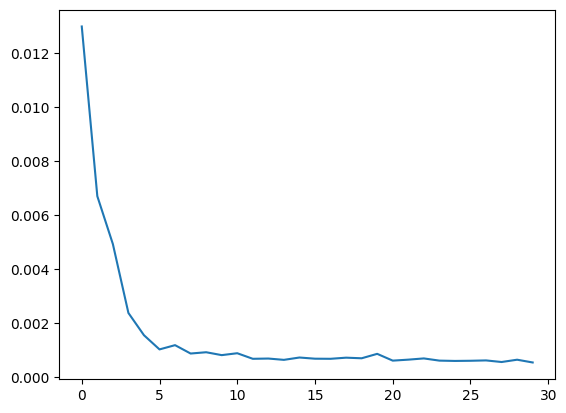

In [153]:
myloss =  model.history.history['loss']
plt.plot(range(len(myloss)), myloss)

In [155]:
test_predictions =[]

# Last n_input points from the training set
first_eval_batch = scaled_train[-12:]

# reshape this to the format RNN (same format of TimeseriesGenerator)
current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):    # Replace len(test) if I want more months of forecast

    current_pred = model.predict(current_batch)[0]

    test_predictions.append(current_pred)

    # UPDATE current batch to include prediction
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [157]:
true_predictions_2LSTM = scaler.inverse_transform(test_predictions)

In [159]:
test['true_predictions_2LSTM'] = true_predictions_2LSTM

C:\Users\nico_\AppData\Local\Temp\ipykernel_27096\2879039208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['true_predictions_2LSTM'] = true_predictions_2LSTM


<Axes: xlabel='DATE'>

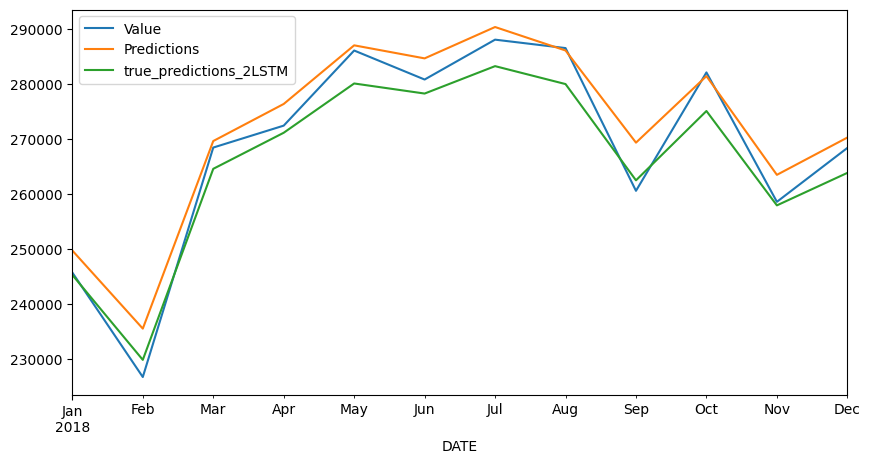

In [163]:
test.plot(figsize=(10,5))

In [167]:
rmse(test['Value'],test['true_predictions_2LSTM'])

4181.706420793662

In [170]:
rmse(test['Value'], test['true_predictions_2LSTM']) * 100 / test['Value'].mean()

1.5560436137551936

The RMSE is lower than with the model with only 1 LSTM but there is just 0.1% difference.